In [2]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

### Loading the MNIST Data
It has 60,000 images in Training set and 10,000 images in Test set

In [3]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Let's grap the shape of the images

In [4]:
print("X_train Original Shape: ",X_train.shape)
print("y_train Original Shape: ",y_train.shape)
print("X_test Original Shape: ",X_test.shape)
print("y_test Original Shape: ",y_test.shape)

X_train Original Shape:  (60000, 28, 28)
y_train Original Shape:  (60000,)
X_test Original Shape:  (10000, 28, 28)
y_test Original Shape:  (10000,)


Hence we can it is 28 x 28 images

### Time to see the first image of our dataset

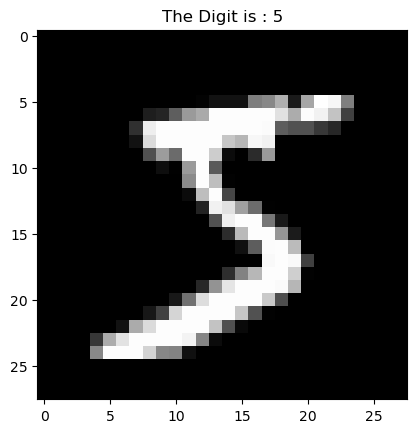

In [5]:
index = 0
plt.imshow(X_train[index],cmap='gray')
plt.title(f"The Digit is : {y_train[index]}")
plt.show()

### Keras is using the `Tensorflow` under the hood. And it follows the following syntax for `Feature train` and `Feature Test`
(Batch, height, width, Channel)
- Batch : It means how many Images to consider
- Height: Height of the Images
- Width : Width of the Images
- Channel : 3 or 1 (RGB, GRAY) respectively


In [6]:
feature_train = X_train.reshape(X_train.shape[0], 28, 28,1)
feature_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Will convert the data type to float of 32-bit
feature_train = feature_train.astype('float32')
feature_test = feature_test.astype('float32')

### Min-Max Scaling on Images
We do not have to apply any complex formula here, as we know the range of color is from 0 - 255 hence dividing it from 255 itself will reduce the range of matrix into 0 - 1

In [7]:
feature_train /= 255
feature_test /= 255

### One Hot Encoding
We have 10 Features hence to convert them into categorical values we will use one hot encoding. For example 2 will be displayed as [0,0,1,0,0,0,0,0,0,0,0]

In [8]:
target_train = np_utils.to_categorical(y_train,10)
target_test = np_utils.to_categorical(y_test,10)

### Let's build the Convulational Neural Network Model

For the Concept of BatchNormalization : https://www.youtube.com/watch?v=yXOMHOpbon8
- The Process of Batch normalization involves `Standardizing` the input values first. 
- Standardization is the process of setting up values of the dataset such that `mean = 0` and `STD = 1`
- Then it is multiplied by some value and then added with another value.
- This two variables are not tunable and it is completely on the network, what values it computes.
- Now this output is `feed` as input of another layer.
- BatchNormalization is applied `between every layer`. It also helps reducing `Overfitting` and does a bit of `Regularization` task.
- It also solves problem like `vanishing gradient`, `unstable gradients problem`.
- Also it is important to note that Batchnomalization makes the model training `Faster`.

In [12]:
# Initializing the model
model = Sequential()

# Adding the layer of convulation operation
model.add(Conv2D(32, (3,3), input_shape=(28,28,1)))

#Add the layer of Activation function
model.add(Activation('relu'))

#Add BatchNormalization
model.add(BatchNormalization())

#Again Convulation
model.add(Conv2D(32,(3,3)))

#Add the layer of Activation function
model.add(Activation('relu'))

#Add the max pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#Add BatchNormalization
model.add(BatchNormalization())

#Again Convulation
model.add(Conv2D(64,(3,3)))

#Add the layer of Activation function
model.add(Activation('relu'))

#Add BatchNormalization
model.add(BatchNormalization())

#Again Convulation
model.add(Conv2D(64,(3,3)))

#Add the layer of Activation function
model.add(Activation('relu'))

#Add the max pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten
model.add(Flatten())

#Add BatchNormalization
model.add(BatchNormalization())

#Dense
model.add(Dense(512))

#Add the layer of Activation function
model.add(Activation('relu'))

#Add BatchNormalization
model.add(BatchNormalization())

#Regularisation to avoid Overfitting
model.add(Dropout(0.3))

#Dense
#SoftMax function is used as we are dealing wiht categorical valriable
model.add(Dense(10, activation='softmax'))

#Summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_3 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                    

### Now we will fit our data into Network

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(feature_train, target_train, batch_size=128, epochs=5, validation_data=(feature_test,target_test), verbose=1)

Epoch 1/5
469/469 [==============================] - 87s 178ms/step - loss: 0.1028 - accuracy: 0.9693 - val_loss: 0.4277 - val_accuracy: 0.8600
Epoch 2/5
469/469 [==============================] - 82s 174ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.0320 - val_accuracy: 0.9901
Epoch 3/5
469/469 [==============================] - 81s 173ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0384 - val_accuracy: 0.9882
Epoch 4/5
469/469 [==============================] - 83s 177ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0338 - val_accuracy: 0.9886
Epoch 5/5
469/469 [==============================] - 86s 182ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0243 - val_accuracy: 0.9938


In [14]:
score = model.evaluate(feature_test, target_test)
print("Test Accuracy: ",score[1])

313/313 [==============================] - 4s 14ms/step - loss: 0.0243 - accuracy: 0.9938
Test Accuracy:  0.9937999844551086


### Concept of Data Augmentation
- Deep learning requires to have large dataset. which we often doesnot have.
- So Data Augmentation rotates, transforms, scales, flips the same image in order to have different images from same image.
- Reduces the overfitting.

In [18]:
train_generator = ImageDataGenerator(rotation_range=7, width_shift_range=0.05,height_shift_range=0.07, shear_range=0, zoom_range=0.05)

#Test Image data is not transformed because this transformation will make sure that 
# neural network will work better in the sense that we are able to classify images more precisely.
test_generator = ImageDataGenerator()

train_generator = train_generator.flow(feature_train, target_train, batch_size=64)
test_generator = test_generator.flow(feature_test, target_test, batch_size=64)

In [19]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


937/937 [==============================] - 96s 101ms/step - loss: 0.0684 - accuracy: 0.9788 - val_loss: 0.0279 - val_accuracy: 0.9910
Epoch 2/5
937/937 [==============================] - 93s 99ms/step - loss: 0.0393 - accuracy: 0.9880 - val_loss: 0.0371 - val_accuracy: 0.9891
Epoch 3/5
937/937 [==============================] - 94s 100ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0255 - val_accuracy: 0.9922
Epoch 4/5
937/937 [==============================] - 94s 100ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0255 - val_accuracy: 0.9924
Epoch 5/5
937/937 [==============================] - 94s 100ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0196 - val_accuracy: 0.9936
